In [1]:
%%capture
## compile PyRossTSI for this notebook
import os
owd = os.getcwd()
os.chdir('../..')
%run setup.py install
os.chdir(owd)

import pyrosstsi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 15                                       # Longest  infectious duration
Td = 5                                       # Doubling time in linear growth regime
Tf = 150                                     # Duration of simulation

tsi  = np.array([0,   3,    5,   10,   T])   # Time since infection (days)
beta = np.array([0,   0.5,  1,   .5,   0])   # Mean infectiousness 
tsi_sc=np.array([0,3.,6., 9.,   12,    T]) 

M = 2                                        # Number of age groups to model
Ni = 10**6*np.ones(M)                        # Number of people in each age group
Np = sum(Ni)                                 # Total population size

subclasses = ['Recovered', 'Hospitalized', 'Mortality']  
Nc = len(subclasses)
Nk = 10                #Number of stages in Predictor/Corrector method
Tc = T/2               

def contactMatrix(t):    return np.array([[4, 1],[1, 2]]); 

In [3]:
parameters = {'M':M, 'Ni':Ni, 'Nc':Nc, 'Nk':Nk, 
              'Tf':Tf, 'Tc':Tc, 'T':T, 'Td':Td,
              'tsi':tsi,'beta':beta,'tsi_sc':tsi_sc,
              'contactMatrix':contactMatrix}

In [4]:
model = pyrosstsi.deterministic.Simulator(parameters, subclasses)

In [5]:
IC = model.get_IC()
data   = model.integrate(IC)

[0.49948108 0.49978499]
[0.49870849 0.49946464]
[0.49764691 0.49902396]
[0.4962907 0.4984601]
[0.49460038 0.4977559 ]
[0.4924768  0.49686889]
[0.48982127 0.49575594]
[0.48651685 0.49436515]
[0.48241324 0.49262869]
[0.4773234  0.49046038]
[0.47103917 0.48776059]
[0.46333358 0.48441513]
[0.45394907 0.48028706]
[0.44261546 0.47522009]
[0.42907141 0.46904258]
[0.41308927 0.46157216]
[0.39451367 0.45262658]
[0.3733084  0.44204031]
[0.34960355 0.42968627]
[0.32373306 0.41550196]
[0.29624931 0.39951719]
[0.26790063 0.38187769]
[0.23956476 0.36285702]
[0.21214673 0.34285057]
[0.18646356 0.32234831]
[0.16314573 0.30188886]
[0.14258058 0.28200337]
[0.124907   0.26316148]
[0.110053   0.24573069]
[0.09779697 0.22995566]
[0.08783236 0.21595781]
[0.07982209 0.20375067]
[0.0734367  0.19326396]
[0.06837678 0.18437013]
[0.06438318 0.17690861]
[0.06123892 0.17070534]
[0.05876661 0.16558696]
[0.05682355 0.1613901 ]
[0.05529628 0.15796659]
[0.0540952  0.15518577]
[0.05314993 0.15293489]
[0.05240534 0.1511

In [6]:
IC

[array([0.5, 0.5]),
 array([[3.69551813e-03, 1.53073373e-03],
        [2.32803054e-03, 9.64301824e-04],
        [1.46656734e-03, 6.07472083e-04],
        [9.23879533e-04, 3.82683432e-04],
        [5.82007635e-04, 2.41075456e-04],
        [3.66641835e-04, 1.51868021e-04],
        [2.30969883e-04, 9.56708581e-05],
        [1.45501909e-04, 6.02688640e-05],
        [9.16604589e-05, 3.79670052e-05],
        [5.77424708e-05, 2.39177145e-05]]),
 array([[0., 0.],
        [0., 0.],
        [0., 0.]])]

(0.0, 17694.856984503815)

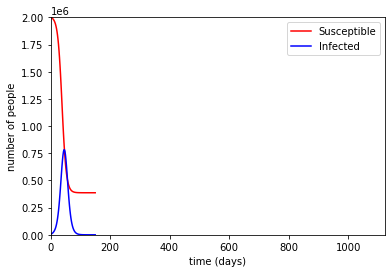

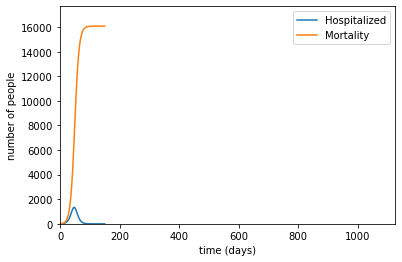

In [7]:
t = data['t']
S_t = data['S_t']
I_t = data['I_t']
Ic_t = data['Ic_t']


plt.figure()    
plt.plot(t*Tc,Np*np.sum(S_t,0),'r', label = 'Susceptible')           #all susceptible
plt.plot(t*Tc,Np*np.sum(I_t,0),'b', label = 'Infected')              #all Infected
plt.legend()
plt.xlabel('time (days)');       plt.xlim(0,Tf*Tc)
plt.ylabel('number of people');  plt.ylim(0,Np)

#Other subclasses of Infected:
plt.figure() 
for i in (1 + np.arange(Nc-1)):
    plt.plot(Tc*t,Np*np.sum(Ic_t[i,:,:],0), label = subclasses[i])
plt.legend()
plt.xlabel('time (days)')
plt.ylabel('number of people')
plt.xlabel('time (days)');       plt.xlim(0,Tf*Tc)
plt.ylabel('number of people');  plt.ylim(0,1.1*np.amax(Np*np.sum(Ic_t[2,:,:],0)))